# Seaborn

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
from pydataset import data

np.random.seed(123)

students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades,
                   'classroom': np.random.choice(['A', 'B'], len(students))})

df['passing_math'] = df.math.apply(lambda n: 'passing' if n >= 70 else 'failing')
tips = data('tips')

In [8]:
df

,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,failing
1,Jane,88,79,67,B,passing
2,Suzie,94,74,95,A,passing
3,Billy,98,96,88,B,passing
4,Ada,77,92,98,A,passing
5,John,79,76,93,B,passing
6,Thomas,82,64,81,A,passing
7,Marie,93,63,90,A,passing
8,Albert,92,62,87,A,passing
9,Richard,69,80,94,A,failing


In [12]:
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [15]:
import seaborn as sns
from matplotlib import pyplot as plt

Text(0.5, 20.80000000000002, 'Math Grade')

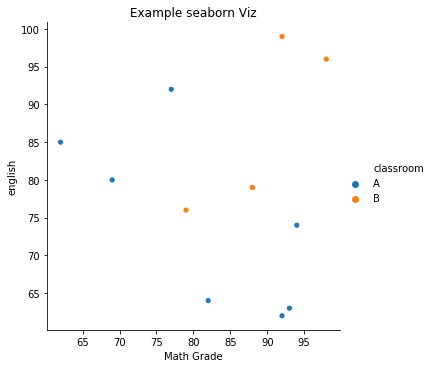

In [18]:
sns.relplot(data=df, x='math', y='english', hue='classroom')
plt.title('Example seaborn Viz')
plt.xlabel('Math Grade')

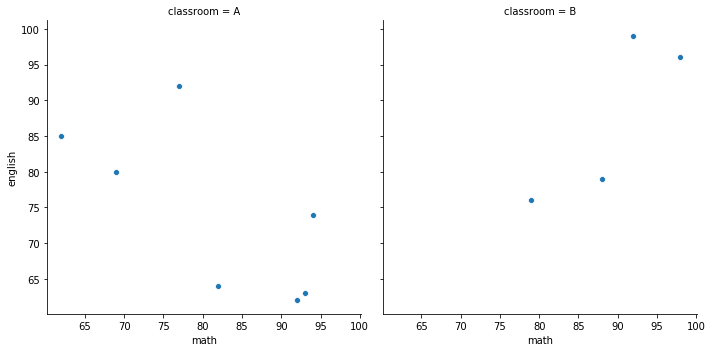

In [21]:
sns.relplot(data=df, x='math', y='english', col='classroom')

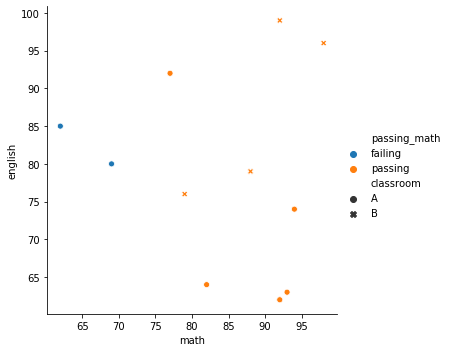

In [22]:
sns.relplot(data=df, x='math', y='english', hue='passing_math', style='classroom')

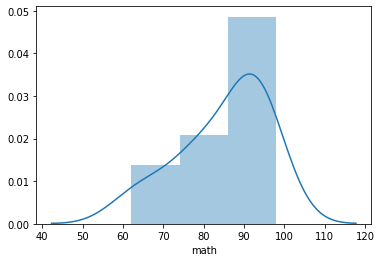

In [23]:
sns.distplot(df.math)

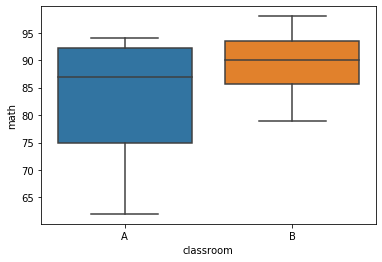

In [26]:
sns.boxplot(data=df, y='math', x='classroom')

Text(0.5, 90.0, '90.0')

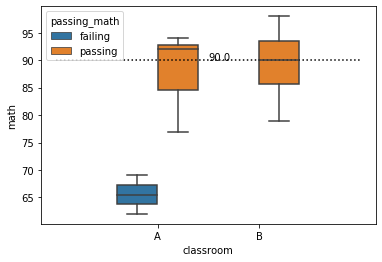

In [35]:
sns.boxplot(data=df, y='math', x='classroom', hue='passing_math')
# overall math grade median
plt.hlines(df.math.median(), -1, 2, ls=':')
plt.text(.5, df.math.median(), '{}'.format(df.math.median()))

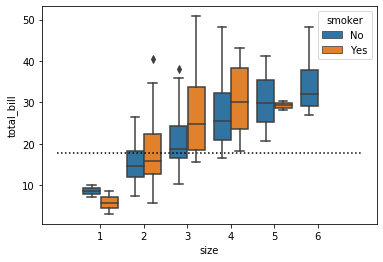

In [43]:
from pydataset import data
tips = data('tips')

sns.boxplot(data=tips, y='total_bill', x='size', hue='smoker')
# add a line at the overall median
plt.hlines(tips.total_bill.median(), -1, 6, ls=':')

In [51]:
df.corr()

,math,english,reading
math,1.000000,-0.151234,-0.060959
english,-0.151234,1.000000,0.335586
reading,-0.060959,0.335586,1.000000


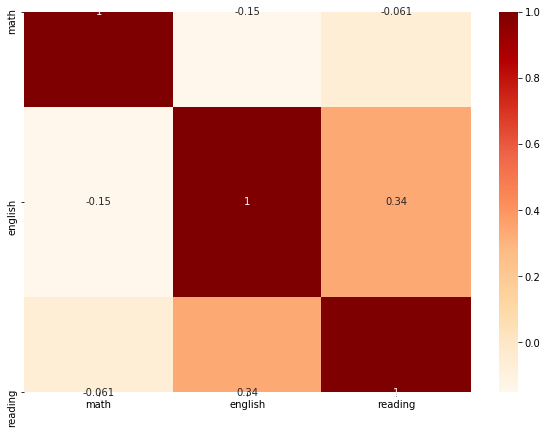

In [62]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='OrRd')

In [55]:
sns.heatmap?

In [66]:
tips[['size', 'smoker']]

,size,smoker
1,2,No
2,3,No
3,3,No
4,2,No
5,4,No
...,...,...
240,3,No
241,2,Yes
242,2,Yes
243,2,No


In [65]:
pd.crosstab(tips['size'], tips.smoker)

smoker,No,Yes
size,,
1,2,2
2,90,66
3,26,12
4,26,11
5,3,2
6,4,0


In [70]:
tips

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
240,29.03,5.92,Male,No,Sat,Dinner,3
241,27.18,2.00,Female,Yes,Sat,Dinner,2
242,22.67,2.00,Male,Yes,Sat,Dinner,2
243,17.82,1.75,Male,No,Sat,Dinner,2


In [71]:
tips.pivot_table('total_bill', 'size', ['smoker', 'time'], aggfunc='max')

smoker     No           Yes       
time   Dinner  Lunch Dinner  Lunch
size                              
1        7.25  10.07   3.07   8.58
2       26.41  24.71  40.55  32.68
3       38.07  22.82  50.81  18.71
4       48.33  34.83  40.17  43.11
5       29.85  41.19  30.46    NaN
6       48.17  34.30    NaN    NaN

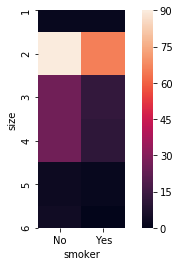

In [60]:
sns.heatmap(pd.crosstab(tips['size'], tips.smoker))

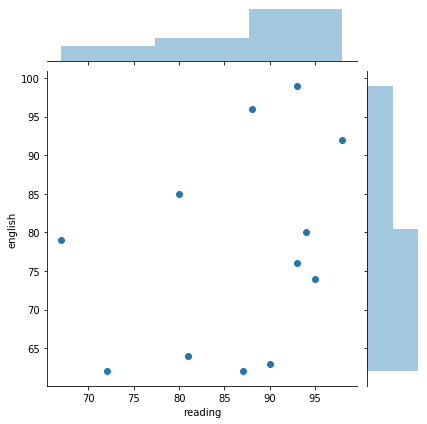

In [63]:
sns.jointplot(data=df, x='reading', y='english')

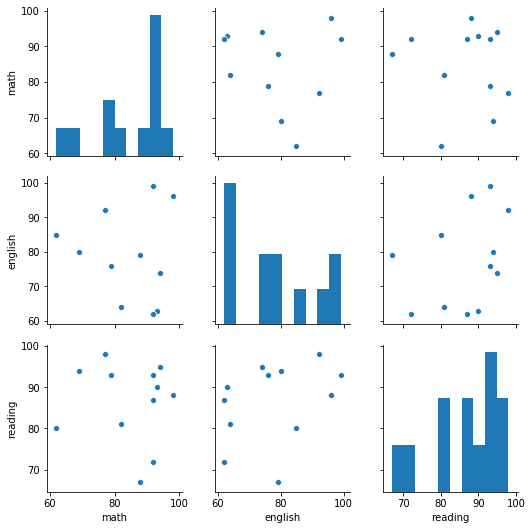

In [64]:
sns.pairplot(data=df)